%age of outliers=11.11111111111111%
Outliers:
Index(['BEEF ROAST', 'CLAMS RAW', 'CLAMS CANNED'], dtype='object', name='Food_Item')
[0.43926469 0.66844264 0.83798533 0.99967967 1.        ]


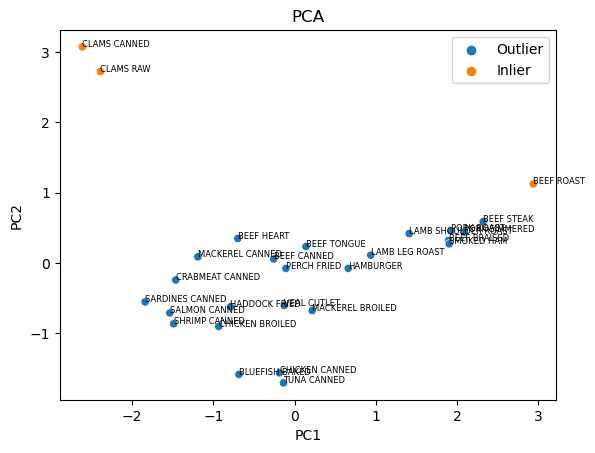

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
import seaborn as sns 
#for milk and nutrient dataset
df = pd.read_csv(r"C:/Users\dai\Desktop\Machine Learning\Datasets\nutrient.csv", index_col=0)
############################################################################

clf = IsolationForest(contamination=0.1, random_state=24)
clf.fit(df)
predictions = clf.predict(df)

print("%age of outliers="+ str((predictions<0).mean()*100)+ "%")
abn_ind = np.where(predictions < 0)
print("Outliers:")
print(df.index[abn_ind])

###### Visualization of Outliers ################
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
prcomp = PCA()
scores = prcomp.fit_transform(scaled_df)

print(np.cumsum(prcomp.explained_variance_ratio_))

obs = np.where(predictions == -1, "Inlier", "Outlier")
PCs = pd.DataFrame({'PC1':scores[:,0], 'PC2':scores[:,1],
                    'Class':obs})

sns.scatterplot(data=PCs, x='PC1',
                y='PC2', hue='Class')
for i in np.arange(0, df.shape[0] ):
    plt.text(scores[i,0], scores[i,1], 
             list(df.index)[i],fontsize=6)
plt.legend(loc='best')
plt.title("PCA")
plt.show()






%age of outliers=20.679611650485437%
Outliers:
Index([540.0, 332.5, 332.5, 198.6, 380.0, 427.5, 342.0, 475.0, 427.5, 139.6,
       ...
       145.4, 162.0, 153.6, 151.8, 309.9, 143.6, 160.2, 132.0, 164.2, 139.7],
      dtype='float64', name='Cement', length=213)
[0.28582372 0.4938425  0.64870871 0.77560821 0.89528493 0.95310246
 0.98668368 1.        ]


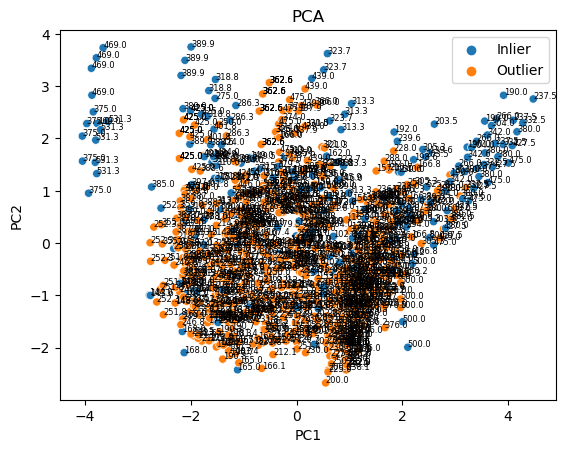

In [7]:
df = pd.read_csv(r"C:/Users\dai\Desktop\Machine Learning\Cases\Cases\Concrete Strength\Concrete_Data.csv", index_col=0)
############################################################################
X=df.drop('Strength',axis=1)
y=df['Strength']
clf = IsolationForest( random_state=24)
clf.fit(df)
predictions = clf.predict(df)

print("%age of outliers="+ str((predictions<0).mean()*100)+ "%")
abn_ind = np.where(predictions < 0)
print("Outliers:")
print(df.index[abn_ind])

###### Visualization of Outliers ################
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
prcomp = PCA()
scores = prcomp.fit_transform(scaled_df)

print(np.cumsum(prcomp.explained_variance_ratio_))

obs = np.where(predictions == -1, "Inlier", "Outlier")
PCs = pd.DataFrame({'PC1':scores[:,0], 'PC2':scores[:,1],
                    'Class':obs})

sns.scatterplot(data=PCs, x='PC1',
                y='PC2', hue='Class')
for i in np.arange(0, df.shape[0] ):
    plt.text(scores[i,0], scores[i,1], 
             list(df.index)[i],fontsize=6)
plt.legend(loc='best')
plt.title("PCA")
plt.show()
